# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

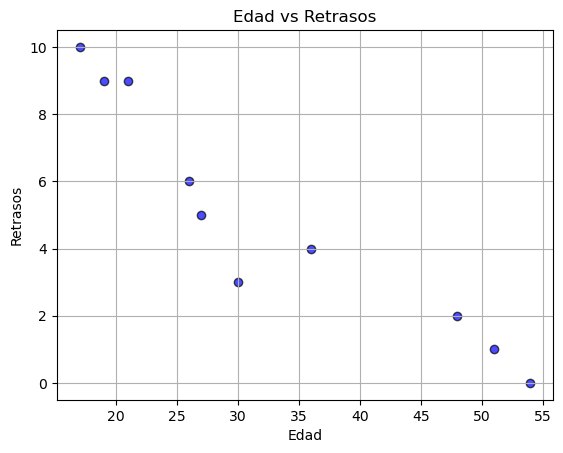

In [4]:
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='blue', edgecolor='k', alpha=0.7)

plt.title('Edad vs Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')

plt.grid(True)
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

*tu explicación aquí*

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [9]:
cov_matrix = student_data.cov()
cov_edad_retrasos = cov_matrix.loc['Edad', 'Retrasos']

correlation_matrix = student_data.corr()
correlation_edad_retrasos = correlation_matrix.loc['Edad', 'Retrasos']





Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [13]:
X = student_data[['Edad']]  
y = student_data['Retrasos'] 

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

slope = model.coef_[0]
intercept = model.intercept_




Grafica tu modelo de regresión en tu diagrama de dispersión.

/Users/elisaaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


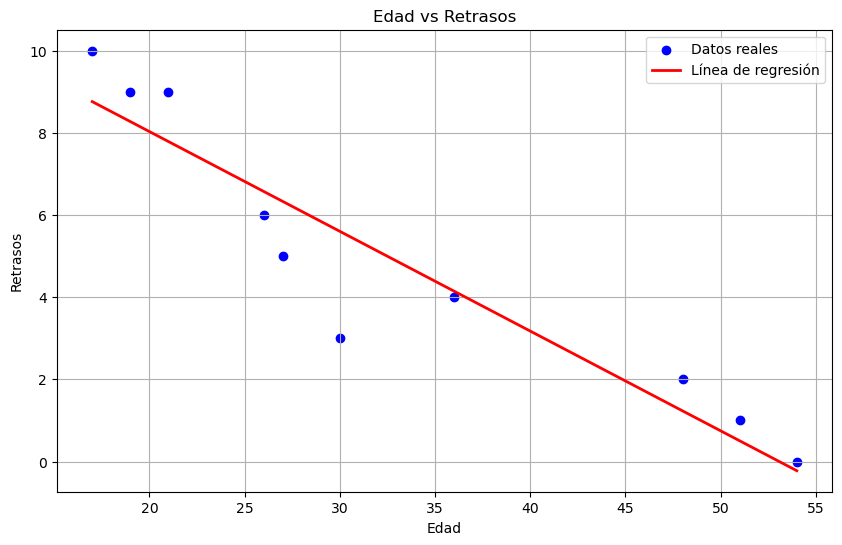

In [15]:
plt.figure(figsize=(10, 6))

# Diagrama de dispersión
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='blue', label='Datos reales')

# Línea de regresión
# Para dibujar la línea de regresión, necesitamos dos puntos: el mínimo y el máximo de `Edad`
x_values = np.linspace(student_data['Edad'].min(), student_data['Edad'].max(), 100)
y_values = model.predict(x_values.reshape(-1, 1))

plt.plot(x_values, y_values, color='red', linewidth=2, label='Línea de regresión')

# Añadir títulos y etiquetas
plt.title('Edad vs Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

*tu explicación aquí*

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [16]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [19]:
variables_interes = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

subset = vehicles[variables_interes]

correlations = subset.corr()['CO2 Emission Grams/Mile']
correlations

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X = subset.drop('CO2 Emission Grams/Mile', axis=1) 
y = subset['CO2 Emission Grams/Mile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)



Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Your code here.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [28]:
import pandas as pd

# Crear el DataFrame con los datos proporcionados
data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
}

df = pd.DataFrame(data)

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

/Users/elisaaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


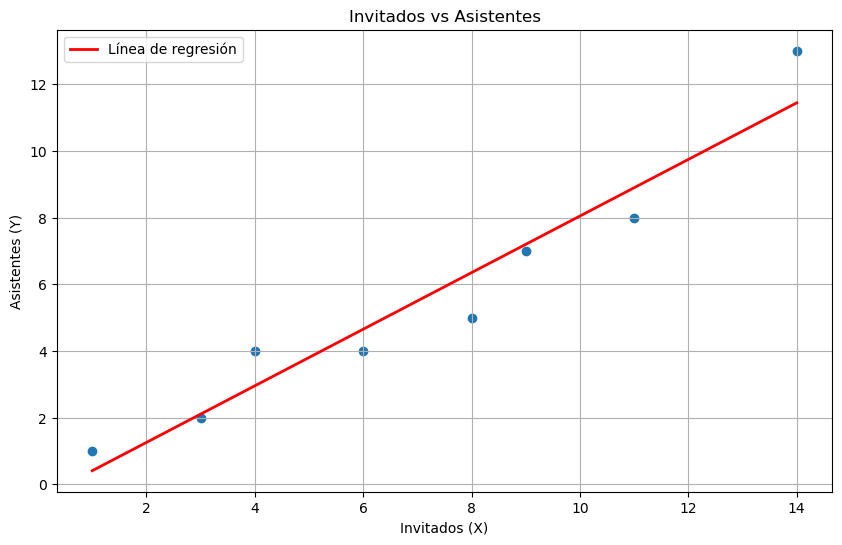

In [32]:
X = df[['X']]  # Variable independiente (predictora)
y = df['Y']    # Variable dependiente (resultado)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Crear el diagrama de dispersión y la línea de regresión
plt.figure(figsize=(10, 6))

# Diagrama de dispersión
plt.scatter(df['X'], df['Y'])

# Línea de regresión
x_values = np.linspace(df['X'].min(), df['X'].max(), 100)
y_values = model.predict(x_values.reshape(-1, 1))

plt.plot(x_values, y_values, color='red', linewidth=2, label='Línea de regresión')

# Añadir títulos y etiquetas
plt.title('Invitados vs Asistentes')
plt.xlabel('Invitados (X)')
plt.ylabel('Asistentes (Y)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data_cleaned = data[data['X'] !=14]

X = data_cleaned[['X']]
y = data_cleaned['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)



KeyError: True

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*